## **Computer assignment 1: (Integer) Linear Programming**

**Submitted by**

Student 1: Sude Yiǧit

Student 2: Loïs Jonathas

#### **1. Diet problem**

In [1]:
import pulp
import matplotlib.pyplot as plt

##### **a) Mathematical Formulation**

Here is the mathematical formulation for the linear optimization problem.

**Decision Variables:**

Let $x_i$ be the number of servings for each food $i$, where:
- $x_1$: Raw carrots
- $x_2$: Baked potatoes
- $x_3$: Wheat bread
- $x_4$: Cheddar cheese
- $x_5$: Peanut butter

**Objective Function:**

The goal is to minimize the total cost of the diet. The objective function is:

Minimize $Z = 0.14x_1 + 0.12x_2 + 0.20x_3 + 0.75x_4 + 0.15x_5$

**Constraints:**

The diet must satisfy the minimum nutritional requirements.

1.  **Calories:** $23x_1 + 171x_2 + 65x_3 + 112x_4 + 188x_5 \ge 2000$
2.  **Fat:** $0.1x_1 + 0.2x_2 + 0x_3 + 9.3x_4 + 16x_5 \ge 50$
3.  **Protein:** $0.6x_1 + 3.7x_2 + 2.2x_3 + 7x_4 + 7.7x_5 \ge 100$
4.  **Carbohydrates:** $6x_1 + 30x_2 + 13x_3 + 0x_4 + 2x_5 \ge 250$
5.  **Non-negativity:** $x_i \ge 0$ for $i = 1, 2, 3, 4, 5$

##### **b) Linear Programming (Fractional Servings)**

Now, let's solve this using linear programming. Here, we assume we can have fractional servings (like 0.5 servings of bread).

In [2]:
# food data from the table - prices and nutritional info
foods = ['Raw carrots', 'Baked potatoes', 'Wheat bread', 'Cheddar cheese', 'Peanut butter']
prices = [0.14, 0.12, 0.2, 0.75, 0.15]
calories = [23, 171, 65, 112, 188]
fat = [0.1, 0.2, 0, 9.3, 16]
protein = [0.6, 3.7, 2.2, 7, 7.7]
carbs = [6, 30, 13, 0, 2]

# minimum daily requirements
min_calories = 2000
min_fat = 50
min_protein = 100
min_carbs = 250

# setting up the LP problem
prob_1b = pulp.LpProblem("Diet_Problem_1b", pulp.LpMinimize)

# decision variables - can be fractional
x = [pulp.LpVariable(f"x{i+1}", lowBound=0, cat='Continuous') for i in range(5)]

# objective: minimize total cost of the diet
prob_1b += pulp.lpSum([prices[i] * x[i] for i in range(5)]), "Total_Cost"

# constraints: make sure we meet all minimum nutrient requirements
prob_1b += pulp.lpSum([calories[i] * x[i] for i in range(5)]) >= min_calories, "Min_Calories"
prob_1b += pulp.lpSum([fat[i] * x[i] for i in range(5)]) >= min_fat, "Min_Fat"
prob_1b += pulp.lpSum([protein[i] * x[i] for i in range(5)]) >= min_protein, "Min_Protein"
prob_1b += pulp.lpSum([carbs[i] * x[i] for i in range(5)]) >= min_carbs, "Min_Carbs"

# solving it
prob_1b.solve(pulp.PULP_CBC_CMD(msg=0))

# displaying results
print("="*70)
print("QUESTION 1b: Linear Programming Solution (Fractions Allowed)")
print("="*70)
print("\nStatus:", pulp.LpStatus[prob_1b.status])
print("\nOptimal servings:")
for i, food in enumerate(foods):
    print(f"  {food}: {x[i].varValue:.4f} servings")

print(f"\nTotal cost: ${pulp.value(prob_1b.objective):.4f}")

# let's verify we actually met the requirements
total_cal = sum(calories[i] * x[i].varValue for i in range(5))
total_fat = sum(fat[i] * x[i].varValue for i in range(5))
total_prot = sum(protein[i] * x[i].varValue for i in range(5))
total_carb = sum(carbs[i] * x[i].varValue for i in range(5))

print("\nActual nutrient intake:")
print(f"  Calories: {total_cal:.2f} (minimum: {min_calories})")
print(f"  Fat: {total_fat:.2f} (minimum: {min_fat})")
print(f"  Protein: {total_prot:.2f} (minimum: {min_protein})")
print(f"  Carbohydrate: {total_carb:.2f} (minimum: {min_carbs})")

QUESTION 1b: Linear Programming Solution (Fractions Allowed)

Status: Optimal

Optimal servings:
  Raw carrots: 0.0000 servings
  Baked potatoes: 7.7147 servings
  Wheat bread: 0.0000 servings
  Cheddar cheese: 0.0000 servings
  Peanut butter: 9.2800 servings

Total cost: $2.3178

Actual nutrient intake:
  Calories: 3063.84 (minimum: 2000)
  Fat: 150.02 (minimum: 50)
  Protein: 100.00 (minimum: 100)
  Carbohydrate: 250.00 (minimum: 250)


##### **c) Peanut Butter with Tiered Pricing**

What if the price of peanut butter changes? Let's say the first 5 servings are cheap (0.15), but any serving after that is more expensive (0.25). We can model this by splitting the peanut butter variable into two.

In [3]:
# setting up a new LP problem
prob_1c = pulp.LpProblem("Diet_Problem_1c", pulp.LpMinimize)

# decision variables for the first 4 foods (same as before)
x_1c = [pulp.LpVariable(f"x{i+1}_1c", lowBound=0, cat='Continuous') for i in range(4)]

# splitting peanut butter into two variables for the two price tiers
y1 = pulp.LpVariable("y1", lowBound=0, upBound=5, cat='Continuous')  # first 5 units at lower price
y2 = pulp.LpVariable("y2", lowBound=0, cat='Continuous')  # above 5 units at higher price

# objective with tiered pricing for peanut butter
prob_1c += (pulp.lpSum([prices[i] * x_1c[i] for i in range(4)]) + 
            0.15 * y1 + 0.25 * y2), "Total_Cost"

# constraints - total peanut butter is y1 + y2
prob_1c += (pulp.lpSum([calories[i] * x_1c[i] for i in range(4)]) + 
            calories[4] * (y1 + y2)) >= min_calories, "Min_Calories"
prob_1c += (pulp.lpSum([fat[i] * x_1c[i] for i in range(4)]) + 
            fat[4] * (y1 + y2)) >= min_fat, "Min_Fat"
prob_1c += (pulp.lpSum([protein[i] * x_1c[i] for i in range(4)]) + 
            protein[4] * (y1 + y2)) >= min_protein, "Min_Protein"
prob_1c += (pulp.lpSum([carbs[i] * x_1c[i] for i in range(4)]) + 
            carbs[4] * (y1 + y2)) >= min_carbs, "Min_Carbs"

# solving it
prob_1c.solve(pulp.PULP_CBC_CMD(msg=0))

# displaying results
print("\n" + "="*70)
print("QUESTION 1c: Peanut Butter with Price Tiers")
print("="*70)
print("First 5 units: $0.15/unit, above 5 units: $0.25/unit")
print("\nStatus:", pulp.LpStatus[prob_1c.status])
print("\nOptimal servings:")
for i in range(4):
    print(f"  {foods[i]}: {x_1c[i].varValue:.4f} servings")
print(f"  Peanut butter (first 5 units): {y1.varValue:.4f} servings")
print(f"  Peanut butter (above 5 units): {y2.varValue:.4f} servings")
print(f"  Peanut butter (total): {y1.varValue + y2.varValue:.4f} servings")

print(f"\nTotal cost: ${pulp.value(prob_1c.objective):.4f}")
print(f"Cost difference from 1b: ${pulp.value(prob_1c.objective) - pulp.value(prob_1b.objective):.4f}")


QUESTION 1c: Peanut Butter with Price Tiers
First 5 units: $0.15/unit, above 5 units: $0.25/unit

Status: Optimal

Optimal servings:
  Raw carrots: 0.0000 servings
  Baked potatoes: 16.6216 servings
  Wheat bread: 0.0000 servings
  Cheddar cheese: 0.0000 servings
  Peanut butter (first 5 units): 5.0000 servings
  Peanut butter (above 5 units): 0.0000 servings
  Peanut butter (total): 5.0000 servings

Total cost: $2.7446
Cost difference from 1b: $0.4268


##### **d) Integer Solution (No Fractions)**

In reality, you can't really buy 0.78 servings of something. Let's re-run the optimization but restrict the servings to be whole numbers (integers). This is now an Integer Linear Programming (ILP) problem.

In [4]:
# setting up the ILP problem
prob_1d = pulp.LpProblem("Diet_Problem_1d", pulp.LpMinimize)

# decision variables - must be integers now (whole servings only)
x_1d = [pulp.LpVariable(f"x{i+1}_1d", lowBound=0, cat='Integer') for i in range(5)]

# objective function (same as 1b)
prob_1d += pulp.lpSum([prices[i] * x_1d[i] for i in range(5)]), "Total_Cost"

# constraints (same as 1b)
prob_1d += pulp.lpSum([calories[i] * x_1d[i] for i in range(5)]) >= min_calories, "Min_Calories"
prob_1d += pulp.lpSum([fat[i] * x_1d[i] for i in range(5)]) >= min_fat, "Min_Fat"
prob_1d += pulp.lpSum([protein[i] * x_1d[i] for i in range(5)]) >= min_protein, "Min_Protein"
prob_1d += pulp.lpSum([carbs[i] * x_1d[i] for i in range(5)]) >= min_carbs, "Min_Carbs"

# solving it
prob_1d.solve(pulp.PULP_CBC_CMD(msg=0))

# displaying results
print("\n" + "="*70)
print("QUESTION 1d: Integer Solution (No Fractions)")
print("="*70)
print("\nStatus:", pulp.LpStatus[prob_1d.status])
print("\nOptimal servings (integers only):")
for i, food in enumerate(foods):
    print(f"  {food}: {int(x_1d[i].varValue)} servings")

print(f"\nTotal cost: ${pulp.value(prob_1d.objective):.4f}")
print(f"Cost increase from 1b: ${pulp.value(prob_1d.objective) - pulp.value(prob_1b.objective):.4f}")

print("\nExplanation:")
print("The integer solution is more expensive because we cannot use fractional")
print("servings. This reduces flexibility and forces us to over-satisfy some")
print("nutrient requirements to meet all constraints with whole servings.")


QUESTION 1d: Integer Solution (No Fractions)

Status: Optimal

Optimal servings (integers only):
  Raw carrots: 0 servings
  Baked potatoes: 9 servings
  Wheat bread: 0 servings
  Cheddar cheese: 0 servings
  Peanut butter: 9 servings

Total cost: $2.4300
Cost increase from 1b: $0.1122

Explanation:
The integer solution is more expensive because we cannot use fractional
servings. This reduces flexibility and forces us to over-satisfy some
nutrient requirements to meet all constraints with whole servings.


##### **e) Minimize Absolute Differences**

Now for a different goal. Instead of minimizing cost, let's try to get as close as possible to the nutritional targets, using only carrots, potatoes, and bread. We want to minimize the total deviation (both over and under) from each target.

In [5]:
# setting up the LP problem
prob_1e = pulp.LpProblem("Diet_Problem_1e", pulp.LpMinimize)

# decision variables - only first 3 foods allowed
x_1e = [pulp.LpVariable(f"x{i+1}_1e", lowBound=0, cat='Continuous') for i in range(3)]

# deviation variables for each nutrient (can go above or below target)
pos_cal = pulp.LpVariable("pos_cal", lowBound=0, cat='Continuous')
neg_cal = pulp.LpVariable("neg_cal", lowBound=0, cat='Continuous')

pos_fat = pulp.LpVariable("pos_fat", lowBound=0, cat='Continuous')
neg_fat = pulp.LpVariable("neg_fat", lowBound=0, cat='Continuous')

pos_prot = pulp.LpVariable("pos_prot", lowBound=0, cat='Continuous')
neg_prot = pulp.LpVariable("neg_prot", lowBound=0, cat='Continuous')

pos_carb = pulp.LpVariable("pos_carb", lowBound=0, cat='Continuous')
neg_carb = pulp.LpVariable("neg_carb", lowBound=0, cat='Continuous')

# objective: minimize total deviation from targets
prob_1e += (pos_cal + neg_cal + pos_fat + neg_fat + 
            pos_prot + neg_prot + pos_carb + neg_carb), "Total_Deviation"

# deviation constraints: actual - target = positive_dev - negative_dev
prob_1e += (pulp.lpSum([calories[i] * x_1e[i] for i in range(3)]) - min_calories == 
            pos_cal - neg_cal), "Cal_Deviation"
prob_1e += (pulp.lpSum([fat[i] * x_1e[i] for i in range(3)]) - min_fat == 
            pos_fat - neg_fat), "Fat_Deviation"
prob_1e += (pulp.lpSum([protein[i] * x_1e[i] for i in range(3)]) - min_protein == 
            pos_prot - neg_prot), "Prot_Deviation"
prob_1e += (pulp.lpSum([carbs[i] * x_1e[i] for i in range(3)]) - min_carbs == 
            pos_carb - neg_carb), "Carb_Deviation"

# solving it
prob_1e.solve(pulp.PULP_CBC_CMD(msg=0))

# displaying results
print("\n" + "="*70)
print("QUESTION 1e: Minimize Absolute Differences")
print("="*70)
print("Goal: Get as close as possible to nutrient targets")
print("Only raw carrots, baked potatoes, and wheat bread allowed")
print("\nStatus:", pulp.LpStatus[prob_1e.status])
print("\nOptimal servings:")
for i in range(3):
    print(f"  {foods[i]}: {x_1e[i].varValue:.4f} servings")

# calculating actual nutrient values
actual_cal = sum(calories[i] * x_1e[i].varValue for i in range(3))
actual_fat = sum(fat[i] * x_1e[i].varValue for i in range(3))
actual_prot = sum(protein[i] * x_1e[i].varValue for i in range(3))
actual_carb = sum(carbs[i] * x_1e[i].varValue for i in range(3))

print("\nActual nutrient intake vs. targets:")
print(f"  Calories: {actual_cal:.2f} (target: {min_calories}, deviation: {abs(actual_cal - min_calories):.2f})")
print(f"  Fat: {actual_fat:.2f} (target: {min_fat}, deviation: {abs(actual_fat - min_fat):.2f})")
print(f"  Protein: {actual_prot:.2f} (target: {min_protein}, deviation: {abs(actual_prot - min_protein):.2f})")
print(f"  Carbohydrate: {actual_carb:.2f} (target: {min_carbs}, deviation: {abs(actual_carb - min_carbs):.2f})")

print(f"\nTotal absolute deviation: {pulp.value(prob_1e.objective):.2f}")


QUESTION 1e: Minimize Absolute Differences
Goal: Get as close as possible to nutrient targets
Only raw carrots, baked potatoes, and wheat bread allowed

Status: Optimal

Optimal servings:
  Raw carrots: 0.0000 servings
  Baked potatoes: 11.6959 servings
  Wheat bread: 0.0000 servings

Actual nutrient intake vs. targets:
  Calories: 2000.00 (target: 2000, deviation: 0.00)
  Fat: 2.34 (target: 50, deviation: 47.66)
  Protein: 43.27 (target: 100, deviation: 56.73)
  Carbohydrate: 350.88 (target: 250, deviation: 100.88)

Total absolute deviation: 205.26


#### **2. Transport problem**
##### **a) Linear optimization problem**

Let $x_{ij}$ be the quantity of units transported from source $i \ (S_i)$ to destination $j \ (D_j)$, where $i \in \{1, 2, 3\}$ and $j \in \{1, 2, 3, 4\}$.

**Objective function**

The goal is to minimize the total transportation cost $Z$:
$$\text{Minimize} \ Z = \sum_{i=1}^3 \sum_{j=1}^4 c_{ij}x_{ij}$$
Explicitly using the given costs $(c_{ij})$: $$\text{Min } Z = 10x_{11} + 0x_{12} + 20x_{13} + 11x_{14} + 12x_{21} + 7x_{22} + 9x_{23} + 20x_{24} + 0x_{31} + 14x_{32} + 16x_{33} + 18x_{34}$$

**Constraints**
1. The total volume transported from each source must not exceed the available supply ($A_i$): 
$$\sum_{j=1}^4 x_{ij} \le A_i \ \text{for} \ i = 1, 2, 3$$
- S1: $x_{11} + x_{12} + x_{13} + x_{14} \leq 20$
- S2: $x_{21} + x_{22} + x_{23} + x_{24} \leq 25$
- S3: $x_{31} + x_{32} + x_{33} + x_{34} \leq 15$

2. The total volume transported to each destination must equal the required demand ($V_j$):
$$\sum_{i=1}^3 x_{ij} = V_j \ \text{for} \ j = 1, 2, 3, 4$$
- D1: $x_{11} + x_{21} + x_{31} = 10$
- D2: $x_{12} + x_{22} + x_{32} = 15$
- D3: $x_{13} + x_{23} + x_{33} = 15$
- D4: $x_{14} + x_{24} + x_{34} = 20$

3. The transported quantities must be non-negative:
$$x_{ij} \ge 0 \ \text{for all} \ i, j$$


##### **b) Cheapest transportation plan**

First we define the parameters of the transportation problem and initialize the linear programming model using the `pulp` library. 

In [6]:
from pulp import LpProblem, LpMinimize, LpVariable, LpStatus, lpSum, value

# Data Definition
Sources = ['S1', 'S2', 'S3']
Destinations = ['D1', 'D2', 'D3', 'D4']
costs = {
    'S1': {'D1': 10, 'D2': 0, 'D3': 20, 'D4': 11}, 
    'S2': {'D1': 12, 'D2': 7, 'D3': 9, 'D4': 20}, 
    'S3': {'D1': 0, 'D2': 14, 'D3': 16, 'D4': 18}
}
supply = {'S1': 20,'S2': 25,'S3': 15}
demand = {'D1': 10, 'D2': 15, 'D3': 15, 'D4': 20}

# Initializing the problem as a minimization problem
model = pulp.LpProblem("Transportation_Optimization", pulp.LpMinimize)

# Defining the decision variables 
x = pulp.LpVariable.dicts("x", 
                          ((i, j) for i in Sources for j in Destinations), 
                          lowBound=0,
                          cat= 'Continuous')

Next we formulate the objective function and add the supply and demand constraints to the model, followed by solving the problem. 

In [7]:
# Objective function: minimize total cost (Z = sum(c_ij * x_ij))
model += pulp.lpSum(costs [i][j] * x[(i, j)] for i in Sources for j in Destinations), "Total_Transportation_Cost"

# Constraints
for i in Sources: 
    model += pulp.lpSum(x[(i, j)] for j in Destinations) <= supply[i], f"Supply_Constraint_{i}"
for j in Destinations:
    model += pulp.lpSum(x[(i, j)] for i in Sources) == demand[j], f"Demand_Constraint_{j}"

pulp.LpSolverDefault.msg = 0

# Solving the problem
model.solve()

# Checking the status of the solution
print(f"Solver Status: {pulp.LpStatus[model.status]}")

print("\nOptimal Transportation Plan (Flows > 0):")
print("{:<10} {:<12} {:<10}".format("Source", "Destination", "Units Sent"))
print("-" * 35)

for i in Sources:
    for j in Destinations:
        amount = value(x[(i, j)])
        if amount > 0:  # Only show non-zero flows
            print("{:<10} {:<12} {:<10.0f}".format(i, j, amount))

total_cost = value(model.objective)
print(f"\nTotal transportation cost: €{total_cost:,.2f}")

Solver Status: Optimal

Optimal Transportation Plan (Flows > 0):
Source     Destination  Units Sent
-----------------------------------
S1         D2           5         
S1         D4           15        
S2         D2           10        
S2         D3           15        
S3         D1           10        
S3         D4           5         

Total transportation cost: €460.00


The problem was successfully solved. The optimal solution yields the minimum total cost and the optimal flow plan, which respects all supply and demand limitations. We can now print the final answer, which is the minimal cost and allocation of goods for each route. 

In [8]:
# Minimum total costs
if pulp.LpStatus[model.status] == "Optimal":
    min_cost = pulp.value(model.objective) 
    print("\n==================================================")
    print (f"The minimum required transportation cost (Z) is: €{min_cost:,.2f}")
    print("==================================================")

    # Optimal Transport Plan (Flows > 0)
    print("\nOptimal Transportation Plan (Flows > 0):")

    # A header for the table output
    print("{:<15} {:<15} {:<10}" .format("Source", "Destination", "Units Sent")) 
    print("-" * 40)

    for i in Sources: 
        for j in Destinations: 
            amount = pulp.value(x[(i,j)])
            if amount > 0:
                print("{:<15}" "{:<15}" "{:<10.0f}" .format(i, j, amount))
else:
    print("\nError: The optimization problem could not be solved. Status: {pulp.LpStatus[model.status]}")


The minimum required transportation cost (Z) is: €460.00

Optimal Transportation Plan (Flows > 0):
Source          Destination     Units Sent
----------------------------------------
S1             D2             5         
S1             D4             15        
S2             D2             10        
S2             D3             15        
S3             D1             10        
S3             D4             5         


##### **c) Fixed costs**

We introduce a binary variable $y_{ij}$ to track whether a route is active. 
1. New decision variable: $y_{ij} \in \{0,1\}$: equals 1 if goods are transported from source $i$ to destination $j$, and 0 otherwise. 
2. Objective function: the goal is to minimize the sum of variable costs and fixed costs. 
$$\text{Minimize } Z = \left( \sum_{i=1}^{3} \sum_{j=1}^{4} c_{ij} x_{ij} \right) + \left( \sum_{i=1}^{3} \sum_{j=1}^{4} 100 \cdot y_{ij} \right)$$
3. The binary variable $(y_{ij})$ is linked to the quantity $(x_{ij})$, using $M = 60$ (total supply/demand):
$$x_{ij} \le 60 \cdot y_{ij} \ \text{for all} \ i, j$$

In [9]:
# Data Definition
Sources = ['S1', 'S2', 'S3']
Destinations = ['D1', 'D2', 'D3', 'D4']

# Cost matrix
costs = {
    'S1': {'D1': 10, 'D2': 0, 'D3': 20, 'D4': 11}, 
    'S2': {'D1': 12, 'D2': 7, 'D3': 9, 'D4': 20}, 
    'S3': {'D1': 0, 'D2': 14, 'D3': 16, 'D4': 18}
}

M = 60
FIXED_COST = 100

# New model
model = pulp.LpProblem("ILP_with_Fixed_Costs", pulp.LpMinimize)

# Defining the binary variables
y = pulp.LpVariable.dicts("y",
                          ((i, j) for i in Sources for j in Destinations), 
                          cat='Binary') 
x = pulp.LpVariable.dicts("x",
                          ((i, j) for i in Sources for j in Destinations),
                          lowBound=0, cat='Continuous')

# Supply and demand constraints
for i in Sources:
    model += pulp.lpSum(x[(i,j)] for j in Destinations) <= supply[i], f"Supply_{i}"

for j in Destinations:
    model += pulp.lpSum(x[(i,j)] for i in Sources) >= demand[j], f"Demand_{j}"

# Redefining the objective
model += (pulp.lpSum(costs[i][j] * x[(i, j)] for i in Sources for j in Destinations)
          + pulp.lpSum(FIXED_COST * y[(i, j)] for i in Sources for j in Destinations)), "ILP_Total_Cost_with_Fixed"

# Adding in the constraints
for i in Sources:
    for j in Destinations: 
        model += x[(i, j)] <= M * y[(i, j)], f"M_Constraint_{i}_{j}"

# Solving the model
model.solve()

# Displaying the results
print("\n=== ILP SOLUTION (Fixed Costs) ===")
print(f"Solver Status: {pulp.LpStatus[model.status]}")

if pulp.LpStatus[model.status] == "Optimal":
    ilp_min_cost = pulp.value(model.objective)
    ilp_fixed_cost = pulp.value(pulp.lpSum(FIXED_COST * y[(i, j)] for i in Sources for j in Destinations))

    print("\n==================================================")
    print(f"Minimum total cost including fixed charges: €{ilp_min_cost:,.2f}")
    print(f"Fixed cost component: €{ilp_fixed_cost:,.2f}")
    print("==================================================")
    
    print("\nOptimal ILP Transport Plan (Flows > 0):")
    print("{:<15} {:<15} {:<10} {:<10}".format("Source", "Destination", "Units Sent", "Fixed Used")) 
    print("-" * 55)

    ilp_routes_used = 0
    for i in Sources:
        for j in Destinations:
            amount = pulp.value(x[(i, j)])
            is_used = pulp.value(y[(i, j)])
            
            if is_used > 0.5:
                ilp_routes_used += 1
                print("{:<15} {:<15} {:<10.0f} {:<10.0f}".format(i, j, amount, is_used))

    print(f"\nTotal number of distinct routes used: {ilp_routes_used}")


=== ILP SOLUTION (Fixed Costs) ===
Solver Status: Optimal

Minimum total cost including fixed charges: €995.00
Fixed cost component: €500.00

Optimal ILP Transport Plan (Flows > 0):
Source          Destination     Units Sent Fixed Used
-------------------------------------------------------
S1              D4              20         1         
S2              D2              15         1         
S2              D3              10         1         
S3              D1              10         1         
S3              D3              5          1         

Total number of distinct routes used: 5


The introduction of fixed costs compels the solver to adopt a different optimization strategy. The ILP solution (€995.00) is significantly higher due to the €500.00 in fixed costs (5 routes $\times$ €100). The solver prioritizes consolidating the total shipment onto a smaller number of distinct routes (5), even if it means using routes that have slightly higher variable costs (e.g., $c_{ij}$) than the minimum possible 6 routes used in the pure LP model. The goal shifts from finding the absolute cheapest per-unit cost to finding the cheapest set of routes to open.

#### **3. Inventory managment**

Base inventory problem:


Results for Base Problem:

Status: Optimal
s_1 = 12.0
s_2 = 8.0
s_3 = 0.0
s_4 = 0.0
s_5 = 3.0
s_6 = 1.0
s_7 = 0.0
x_1 = 9.0
x_2 = 0.0
x_3 = 0.0
x_4 = 10.0
x_5 = 7.0
x_6 = 0.0
x_7 = 0.0
Total costs =  284.0


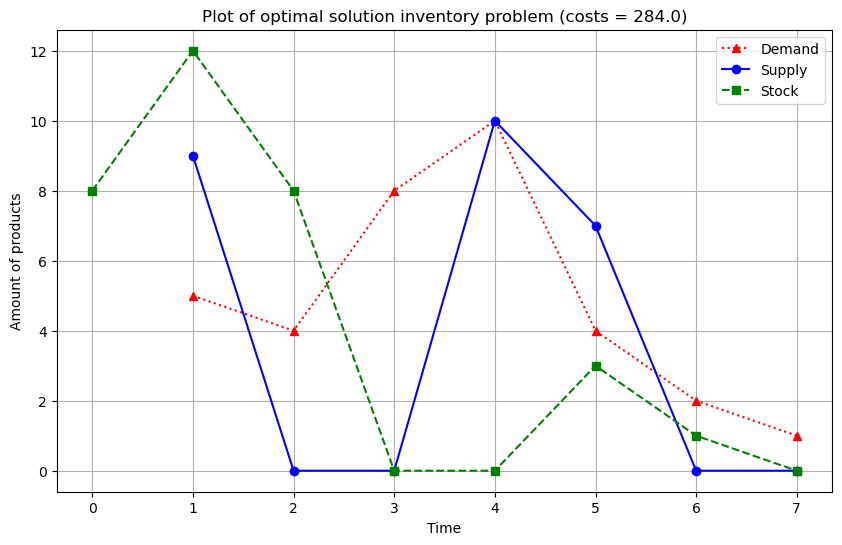

In [10]:
# problem data - basic inventory optimization
initial_stock = 8  # s_0, starting with 8 units already
demands = [None, 5, 4, 8, 10, 4, 2, 1]  # demands[t] = d_t for each period
holding_costs = [None, 1, 1, 1, 1, 1, 1, 1]  # holding_costs[t] = h_t (cost per unit held)
order_costs = [None, 10, 13, 13, 10, 10, 13, 13]  # order_costs[t] = c_t (cost per unit ordered)
max_periods = len(demands) - 1  # total number of periods (T)

# quick sanity check to make sure all arrays have the right length
assert len(holding_costs) == max_periods + 1, "lengths should be equal!"
assert len(order_costs) == max_periods + 1, "lengths should be equal!"

# setting up the optimization model
# ==================================

# creating the problem - we want to minimize total costs
ILO_problem = pulp.LpProblem("Inventory_problem", pulp.LpMinimize)

# variables we need to decide: how much to order and how much stock we'll have
supply = [None] + [pulp.LpVariable(f'x_{t}', cat='Integer', lowBound=0)
                   for t in range(1, max_periods + 1)]  # supply[t] = x_t
stock = [initial_stock] + [pulp.LpVariable(f's_{t}', cat='Integer', lowBound=0)
                           for t in range(1, max_periods + 1)]  # stock[t] = s_t

# our goal: minimize ordering costs + holding costs
ILO_problem += (pulp.lpDot(order_costs[1:], supply[1:]) +
                pulp.lpDot(holding_costs[1:], stock[1:])), "total_costs"

# adding constraints for each time period
for t in range(1, max_periods + 1):
    # this ensures inventory balance: stock now = stock before - demand + new supply
    constr_name = f"stock_balance_period_{t}"
    ILO_problem += stock[t] == stock[t - 1] - demands[t] + supply[t], constr_name

# solving the optimization problem
# =================================

# running the solver and displaying the model
print('\nResults for Base Problem:\n')
ILO_problem.solve(pulp.PULP_CBC_CMD(msg=False))
print("Status:", pulp.LpStatus[ILO_problem.status])

# showing all the decision variables with their optimal values
for v in ILO_problem.variables():
    print(v.name, "=", v.varValue)

# showing the total minimized cost
total_costs = ILO_problem.objective.value()
print("Total costs = ", total_costs)

# extracting values for plotting
supply_values = [None] + [el.value() for el in supply[1:]]
stock_values = [stock[0]] + [el.value() for el in stock[1:]]

# creating visualization
# ======================

# setting up the plot
plt.figure(figsize=(10, 6))

# plotting demand, supply, and stock levels over time
time_stamps = list(range(max_periods + 1))
plt.plot(time_stamps, demands, label='Demand', marker='^', linestyle=':',
         color='red')
plt.plot(time_stamps, supply_values, label='Supply', marker='o',
         linestyle='-', color='blue')
plt.plot(time_stamps, stock_values, label='Stock', marker='s',
         linestyle='--', color='green')

# adding labels and formatting
plt.xlabel('Time')
plt.ylabel('Amount of products')
plt.title(f'Plot of optimal solution inventory problem (costs = {total_costs})')
plt.legend()
plt.xticks(time_stamps)

# displaying the plot
plt.grid(True)
plt.show()

##### **a) Stock Level Constraint**


QUESTION 3a: Inventory Problem with Maximum Stock Constraint
Maximum stock level: 10 units

Solving...

Status: Optimal

Optimal solution:
Period | Supply | Stock | Demand
-------|--------|-------|-------
   1   |   7    |   10   |   5
   2   |   0    |   6   |   4
   3   |   2    |   0   |   8
   4   |   10    |   0   |   10
   5   |   7    |   3   |   4
   6   |   0    |   1   |   2
   7   |   0    |   0   |   1

Total costs = 286.0

Verification: Stock levels never exceed 10?
Maximum stock reached: 10
Constraint satisfied: YES


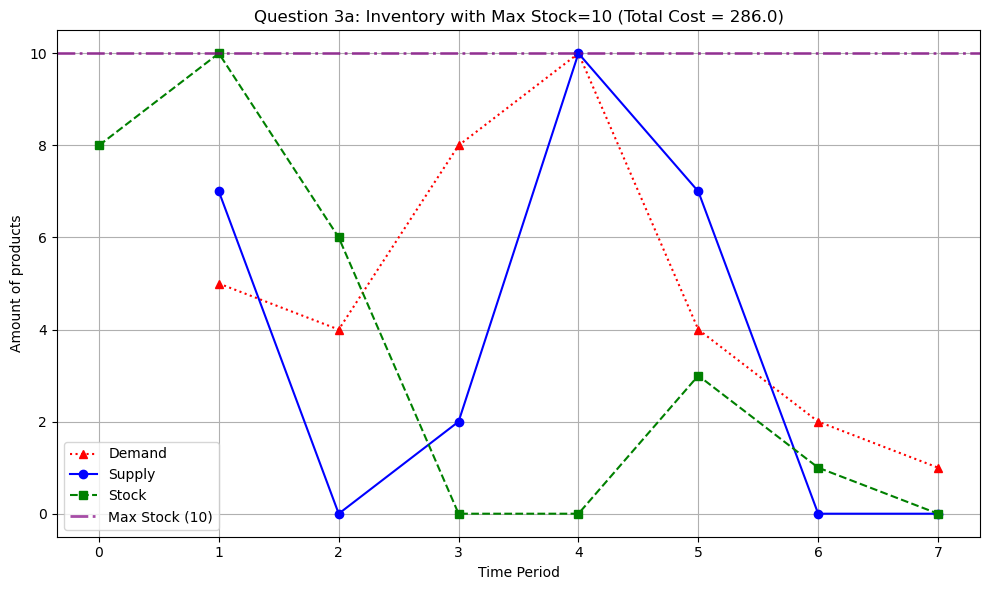

In [11]:
# problem data - starting with 8 units in stock already
initial_stock = 8  # s_0
demands = [None, 5, 4, 8, 10, 4, 2, 1]  # demands[t] = d_t for each period
holding_costs = [None, 1, 1, 1, 1, 1, 1, 1]  # holding_costs[t] = h_t (cost per unit held)
order_costs = [None, 10, 13, 13, 10, 10, 13, 13]  # order_costs[t] = c_t (cost per unit ordered)
max_periods = len(demands) - 1  # total number of periods (T)

# setting up the optimization model
# ==================================

# creating the problem - we want to minimize total costs
ILO_problem_3a = pulp.LpProblem("Inventory_3a_MaxStock", pulp.LpMinimize)

# variables we need to decide: how much to order and how much stock we'll have
supply_3a = [None] + [pulp.LpVariable(f'x_{t}', cat='Integer', lowBound=0)
                   for t in range(1, max_periods + 1)]
stock_3a = [initial_stock] + [pulp.LpVariable(f's_{t}', cat='Integer', lowBound=0)
                           for t in range(1, max_periods + 1)]

# our goal: minimize ordering costs + holding costs
ILO_problem_3a += (pulp.lpDot(order_costs[1:], supply_3a[1:]) +
                pulp.lpDot(holding_costs[1:], stock_3a[1:])), "total_costs"

# adding constraints for each time period
for t in range(1, max_periods + 1):
    # this ensures inventory balance: stock now = stock before - demand + new supply
    ILO_problem_3a += stock_3a[t] == stock_3a[t - 1] - demands[t] + supply_3a[t]
    
    # for part 3a: warehouse can't hold more than 10 units
    ILO_problem_3a += stock_3a[t] <= 10

# solving the optimization problem
# =================================

# running the solver to find optimal solution
print('\n' + '='*70)
print('QUESTION 3a: Inventory Problem with Maximum Stock Constraint')
print('='*70)
print('Maximum stock level: 10 units')
print('\nSolving...\n')

ILO_problem_3a.solve(pulp.PULP_CBC_CMD(msg=False))
print("Status:", pulp.LpStatus[ILO_problem_3a.status])

# displaying the results in a nice table format
print("\nOptimal solution:")
print("Period | Supply | Stock | Demand")
print("-------|--------|-------|-------")
for t in range(1, max_periods + 1):
    print(f"   {t}   |   {int(supply_3a[t].value())}    |   {int(stock_3a[t].value())}   |   {demands[t]}")

# calculating total cost
total_costs_3a = ILO_problem_3a.objective.value()
print(f"\nTotal costs = {total_costs_3a}")

# let's double-check that we never exceeded the max stock limit
print("\nVerification: Stock levels never exceed 10?")
max_stock_reached = max([stock_3a[t].value() for t in range(1, max_periods + 1)])
print(f"Maximum stock reached: {int(max_stock_reached)}")
print(f"Constraint satisfied: {'YES' if max_stock_reached <= 10 else 'NO'}")

# extracting values for plotting
supply_values_3a = [None] + [el.value() for el in supply_3a[1:]]
stock_values_3a = [stock_3a[0]] + [el.value() for el in stock_3a[1:]]

# creating visualization
# ======================

plt.figure(figsize=(10, 6))

# plotting demand, supply, and stock levels over time
time_stamps = list(range(max_periods + 1))
plt.plot(time_stamps, demands, label='Demand', marker='^', linestyle=':',
         color='red')
plt.plot(time_stamps, supply_values_3a, label='Supply', marker='o',
         linestyle='-', color='blue')
plt.plot(time_stamps, stock_values_3a, label='Stock', marker='s',
         linestyle='--', color='green')

# showing the max stock constraint line
plt.axhline(y=10, color='purple', linestyle='-.', linewidth=2, 
            label='Max Stock (10)', alpha=0.7)

plt.xlabel('Time Period')
plt.ylabel('Amount of products')
plt.title(f'Question 3a: Inventory with Max Stock=10 (Total Cost = {total_costs_3a})')
plt.legend()
plt.xticks(time_stamps)
plt.grid(True)
plt.tight_layout()
plt.show()

##### **b) Waste Cost for Leftovers**


QUESTION 3b: Inventory with Waste Cost
Maximum stock level: 10 units (from 3a)
Waste cost: 3 euros per unit at time T

Solving...

Status: Optimal

Optimal solution:
Period | Supply | Stock | Demand
-------|--------|-------|-------
   1   |   7    |   10   |   5
   2   |   0    |   6   |   4
   3   |   2    |   0   |   8
   4   |   10    |   0   |   10
   5   |   7    |   3   |   4
   6   |   0    |   1   |   2
   7   |   0    |   0   |   1

Cost breakdown:
  Order costs:   266
  Holding costs: 20
  Waste costs:   0 (3 euros × 0 units)
  Total costs:   286

Leftover stock at time T=7: 0 units


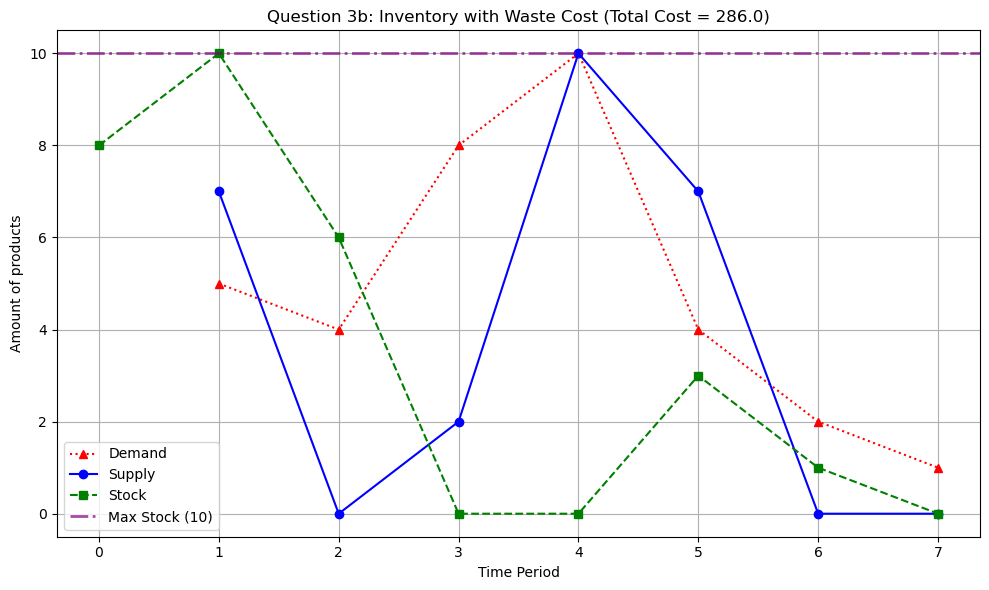

In [12]:
# problem data - same as before but now we care about leftover stock
initial_stock = 8  # s_0
demands = [None, 5, 4, 8, 10, 4, 2, 1]  # demands[t] = d_t for each period
holding_costs = [None, 1, 1, 1, 1, 1, 1, 1]  # holding_costs[t] = h_t (cost per unit held)
order_costs = [None, 10, 13, 13, 10, 10, 13, 13]  # order_costs[t] = c_t (cost per unit ordered)
max_periods = len(demands) - 1  # total number of periods (T)
waste_cost_per_unit = 3  # new: penalty for leftover stock at the end

# setting up the optimization model
# ==================================

# creating the problem - we want to minimize total costs
ILO_problem_3b = pulp.LpProblem("Inventory_3b_WasteCost", pulp.LpMinimize)

# variables we need to decide: how much to order and how much stock we'll have
supply_3b = [None] + [pulp.LpVariable(f'x_{t}', cat='Integer', lowBound=0)
                   for t in range(1, max_periods + 1)]
stock_3b = [initial_stock] + [pulp.LpVariable(f's_{t}', cat='Integer', lowBound=0)
                           for t in range(1, max_periods + 1)]

# our goal: minimize ordering costs + holding costs + waste cost at the end
# note: waste_cost_per_unit * stock[max_periods] penalizes leftover inventory
ILO_problem_3b += (pulp.lpDot(order_costs[1:], supply_3b[1:]) +
                pulp.lpDot(holding_costs[1:], stock_3b[1:]) +
                waste_cost_per_unit * stock_3b[max_periods]), "total_costs"

# adding constraints for each time period
for t in range(1, max_periods + 1):
    # this ensures inventory balance: stock now = stock before - demand + new supply
    ILO_problem_3b += stock_3b[t] == stock_3b[t - 1] - demands[t] + supply_3b[t]
    
    # keeping the max stock constraint from part 3a
    ILO_problem_3b += stock_3b[t] <= 10

# solving the optimization problem
# =================================

# running the solver to find optimal solution
print('\n' + '='*70)
print('QUESTION 3b: Inventory with Waste Cost')
print('='*70)
print('Maximum stock level: 10 units (from 3a)')
print('Waste cost: 3 euros per unit at time T')
print('\nSolving...\n')

ILO_problem_3b.solve(pulp.PULP_CBC_CMD(msg=False))
print("Status:", pulp.LpStatus[ILO_problem_3b.status])

# displaying the results in a nice table format
print("\nOptimal solution:")
print("Period | Supply | Stock | Demand")
print("-------|--------|-------|-------")
for t in range(1, max_periods + 1):
    print(f"   {t}   |   {int(supply_3b[t].value())}    |   {int(stock_3b[t].value())}   |   {demands[t]}")

# breaking down the different cost components to see what we're paying for
order_cost_total = sum(order_costs[t] * supply_3b[t].value() for t in range(1, max_periods + 1))
holding_cost_total = sum(holding_costs[t] * stock_3b[t].value() for t in range(1, max_periods + 1))
waste_cost_total = waste_cost_per_unit * stock_3b[max_periods].value()
total_costs_3b = ILO_problem_3b.objective.value()

print(f"\nCost breakdown:")
print(f"  Order costs:   {order_cost_total:.0f}")
print(f"  Holding costs: {holding_cost_total:.0f}")
print(f"  Waste costs:   {waste_cost_total:.0f} (3 euros × {int(stock_3b[max_periods].value())} units)")
print(f"  Total costs:   {total_costs_3b:.0f}")

print(f"\nLeftover stock at time T={max_periods}: {int(stock_3b[max_periods].value())} units")

# extracting values for plotting
supply_values_3b = [None] + [el.value() for el in supply_3b[1:]]
stock_values_3b = [stock_3b[0]] + [el.value() for el in stock_3b[1:]]

# creating visualization
# ======================

plt.figure(figsize=(10, 6))

# plotting demand, supply, and stock levels over time
time_stamps = list(range(max_periods + 1))
plt.plot(time_stamps, demands, label='Demand', marker='^', linestyle=':',
         color='red')
plt.plot(time_stamps, supply_values_3b, label='Supply', marker='o',
         linestyle='-', color='blue')
plt.plot(time_stamps, stock_values_3b, label='Stock', marker='s',
         linestyle='--', color='green')

# showing the max stock constraint line
plt.axhline(y=10, color='purple', linestyle='-.', linewidth=2, 
            label='Max Stock (10)', alpha=0.7)

plt.xlabel('Time Period')
plt.ylabel('Amount of products')
plt.title(f'Question 3b: Inventory with Waste Cost (Total Cost = {total_costs_3b})')
plt.legend()
plt.xticks(time_stamps)
plt.grid(True)
plt.tight_layout()
plt.show()

##### **c) Fixed Penalty for High Stock**


QUESTION 3c: Inventory with Storage Penalty
Maximum stock level: 10 units (from 3a)
Waste cost: 3 euros per unit at time T (from 3b)
Storage penalty: 5 euros when stock > 5 (NEW)

Solving...

Status: Optimal

Optimal solution:
Period | Supply | Stock | Demand | Penalty?
-------|--------|-------|--------|----------
   1   |   2    |   5   |   5     | NO
   2   |   0    |   1   |   4     | NO
   3   |   7    |   0   |   8     | NO
   4   |   10    |   0   |   10     | NO
   5   |   7    |   3   |   4     | NO
   6   |   0    |   1   |   2     | NO
   7   |   0    |   0   |   1     | NO

Cost breakdown:
  Order costs:    281
  Holding costs:  10
  Waste costs:    0 (3 euros × 0 units)
  Storage penalty: 0 (5 euros × 0 periods)
  Total costs:    291

Periods with stock > 5: 0
Leftover stock at time T=7: 0 units


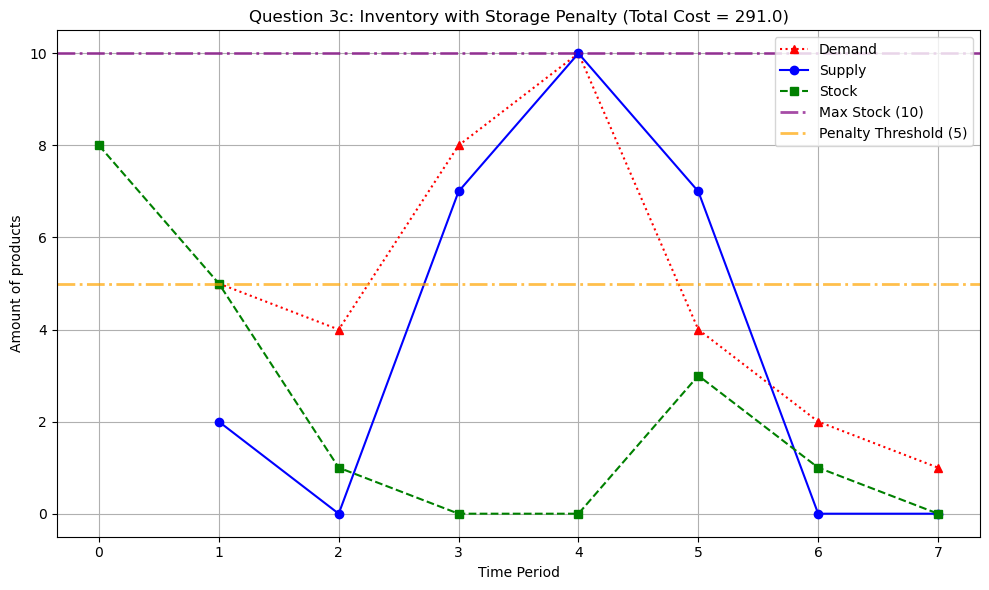

In [13]:
# problem data - now with an extra penalty for keeping too much stock
initial_stock = 8  # s_0
demands = [None, 5, 4, 8, 10, 4, 2, 1]  # demands[t] = d_t for each period
holding_costs = [None, 1, 1, 1, 1, 1, 1, 1]  # holding_costs[t] = h_t (cost per unit held)
order_costs = [None, 10, 13, 13, 10, 10, 13, 13]  # order_costs[t] = c_t (cost per unit ordered)
max_periods = len(demands) - 1  # total number of periods (T)
waste_cost_per_unit = 3  # penalty for leftover stock at the end (from 3b)
storage_penalty = 5  # new: extra penalty each period when stock > 5
M = 1000  # big-M constant for linearization trick

# setting up the optimization model
# ==================================

# creating the problem - we want to minimize total costs
ILO_problem_3c = pulp.LpProblem("Inventory_3c_StoragePenalty", pulp.LpMinimize)

# variables we need to decide: how much to order and how much stock we'll have
supply_3c = [None] + [pulp.LpVariable(f'x_{t}', cat='Integer', lowBound=0)
                   for t in range(1, max_periods + 1)]
stock_3c = [initial_stock] + [pulp.LpVariable(f's_{t}', cat='Integer', lowBound=0)
                           for t in range(1, max_periods + 1)]

# binary indicators: will be 1 if stock exceeds 5, 0 otherwise
# we need these to trigger the penalty only when stock > 5
indicator = [None] + [pulp.LpVariable(f'ind_{t}', cat='Binary')
                      for t in range(1, max_periods + 1)]

# our goal: minimize all costs including the new storage penalty
ILO_problem_3c += (pulp.lpDot(order_costs[1:], supply_3c[1:]) +
                pulp.lpDot(holding_costs[1:], stock_3c[1:]) +
                waste_cost_per_unit * stock_3c[max_periods] +
                storage_penalty * pulp.lpSum(indicator[1:])), "total_costs"

# adding constraints for each time period
for t in range(1, max_periods + 1):
    # this ensures inventory balance: stock now = stock before - demand + new supply
    ILO_problem_3c += stock_3c[t] == stock_3c[t - 1] - demands[t] + supply_3c[t]
    
    # keeping the max stock constraint from part 3a
    ILO_problem_3c += stock_3c[t] <= 10
    
    # this is the clever part: if stock[t] > 5, then indicator[t] must be 1
    # the constraint is: stock[t] <= 5 + M * indicator[t]
    # when stock is 5 or less, indicator can be 0; when stock > 5, indicator must be 1
    ILO_problem_3c += stock_3c[t] <= 5 + M * indicator[t]

# solving the optimization problem
# =================================

# running the solver to find optimal solution
print('\n' + '='*70)
print('QUESTION 3c: Inventory with Storage Penalty')
print('='*70)
print('Maximum stock level: 10 units (from 3a)')
print('Waste cost: 3 euros per unit at time T (from 3b)')
print('Storage penalty: 5 euros when stock > 5 (NEW)')
print('\nSolving...\n')

ILO_problem_3c.solve(pulp.PULP_CBC_CMD(msg=False))
print("Status:", pulp.LpStatus[ILO_problem_3c.status])

# displaying the results - now with penalty information too
print("\nOptimal solution:")
print("Period | Supply | Stock | Demand | Penalty?")
print("-------|--------|-------|--------|----------")
for t in range(1, max_periods + 1):
    penalty_flag = "YES" if indicator[t].value() == 1 else "NO"
    print(f"   {t}   |   {int(supply_3c[t].value())}    |   {int(stock_3c[t].value())}   |   {demands[t]}     | {penalty_flag}")

# breaking down all the different cost components
order_cost_total = sum(order_costs[t] * supply_3c[t].value() for t in range(1, max_periods + 1))
holding_cost_total = sum(holding_costs[t] * stock_3c[t].value() for t in range(1, max_periods + 1))
waste_cost_total = waste_cost_per_unit * stock_3c[max_periods].value()
penalty_count = sum(indicator[t].value() for t in range(1, max_periods + 1))
penalty_cost_total = storage_penalty * penalty_count
total_costs_3c = ILO_problem_3c.objective.value()

print(f"\nCost breakdown:")
print(f"  Order costs:    {order_cost_total:.0f}")
print(f"  Holding costs:  {holding_cost_total:.0f}")
print(f"  Waste costs:    {waste_cost_total:.0f} (3 euros × {int(stock_3c[max_periods].value())} units)")
print(f"  Storage penalty: {penalty_cost_total:.0f} (5 euros × {int(penalty_count)} periods)")
print(f"  Total costs:    {total_costs_3c:.0f}")

print(f"\nPeriods with stock > 5: {int(penalty_count)}")
print(f"Leftover stock at time T={max_periods}: {int(stock_3c[max_periods].value())} units")

# extracting values for plotting
supply_values_3c = [None] + [el.value() for el in supply_3c[1:]]
stock_values_3c = [stock_3c[0]] + [el.value() for el in stock_3c[1:]]

# creating visualization
# ======================

plt.figure(figsize=(10, 6))

# plotting demand, supply, and stock levels over time
time_stamps = list(range(max_periods + 1))
plt.plot(time_stamps, demands, label='Demand', marker='^', linestyle=':',
         color='red')
plt.plot(time_stamps, supply_values_3c, label='Supply', marker='o',
         linestyle='-', color='blue')
plt.plot(time_stamps, stock_values_3c, label='Stock', marker='s',
         linestyle='--', color='green')

# showing both constraint lines (max stock and penalty threshold)
plt.axhline(y=10, color='purple', linestyle='-.', linewidth=2, 
            label='Max Stock (10)', alpha=0.7)
plt.axhline(y=5, color='orange', linestyle='-.', linewidth=2, 
            label='Penalty Threshold (5)', alpha=0.7)

plt.xlabel('Time Period')
plt.ylabel('Amount of products')
plt.title(f'Question 3c: Inventory with Storage Penalty (Total Cost = {total_costs_3c})')
plt.legend()
plt.xticks(time_stamps)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **4. Single-Machine Scheduling**
##### **a) Integer linear optimization problem**

The goal is to find a production schedule that minimizes the total cost incurred from jobs exceeding their deadlines (total tardiness). 

**Decision variables**
- $t_j \ge 0$: the start time of job $j$ (continous). 
- $L_j \ge 0$: the tardiness (lateness cost) of job $j$. This is the time (in hours) job $j$ is completed after its due date (continous).  
- $x_{jk} \in \{0, 1\}$: a binary variable that determines the sequence:
    - $x_{jk} = 1$ if job $j$ is processed before job $k$.
    - $x_{jk} = 0$ otherwise. 

**Parameters**
- $D_j$: duration of job $j$
- $R_j$: release time of job $j$
- $E_j$: due date of job $j$
- $M$: a large constant (Big M), greater than the total processing time for all jobs ($M > 40$). 

**Objective function**

The total cost is minimized, where the cost rate is €1 per hour of tardiness. 
$$\text{Minimize } Z = \sum_{j=1}^{10} 1 \cdot L_j$$

**Constraints**

1. Sequencing 

With these constraints we ensure that only one job is running at a time (no overlap) and define the sequence using the Big M method. 
- Non-overlap Rule: for any pair of distinct jobs $j$ and $k$, if job $j$ is scheduled before job $k$ ($x_{jk} = 1$), then $k$ must start after $j$ is completed ($t_j + D_j \le t_k$). 
$$t_j + D_j \le t_k + M(1 - x_{jk}) \ \text{for all} \ j \ne k$$
- Mutual Exclusion: for any pair of distinct jobs, one must be processed before the other. 
$$x_{jk} + x_{kj} = 1 \ \text{for all} \ j < k$$

2. Timing constraints
- Release time: a job can't start before it's release time.
$$t_j \ge R_j \ \text{for all} \ j$$
- Tardiness definition: his constraint links the start time, duration and due date to the tardiness variable $L_j$. The minimization objective ensures $L_j$ is only positive if the completion time ($t_j + D_j$) exceeds the due date ($E_j$). 
$$L_j \ge t_j + D_j - E_j \ \text{for all} \ j$$

3. Variable constraints
- Non-negativity: $$t_j \ge 0, L_j \ge 0 \ \text{for all} \ j$$
- Binary: $$x_{jk} \in \{0, 1\} \ \text{for all} \ j \ne k$$

##### **b) Integer linear optimization model**
We define the parameters $D_j$ (Duration), $R_j$ (Release time) and $E_j$ (Due date) for all 10 jobs. We also need to determine the Big M value; the sum of $D_j$ is $4 + 5 + 3 + 5 + 7 + 0 + 3 + 2 + 10 = 40$. We choose $M = 100$ as a safe margin. 

In [14]:
# Job data
JOBS = list(range(1, 11)) # Jobs 1 to 10
M = 100 # Large constant

# Job parameters
D = {1: 4, 2: 5, 3: 3, 4: 5, 5: 7, 6: 1, 7: 0.01, 8: 3, 9: 2, 10: 10} # Duration
R = {1: 3, 2: 4, 3: 7, 4: 11, 5: 10, 6: 0, 7: 0, 8: 10, 9: 0, 10: 15} # Release time
E = {1: 11, 2: 12, 3: 20, 4: 25, 5: 20, 6: 10, 7: 30, 8: 30, 9: 10, 10: 20} # Due date
COST_RATE = 1 # Costs per hour of delay

# Model initialization
model = pulp.LpProblem("Single_Machine_Scheduling", pulp.LpMinimize)

# 1. Defining the decision variables
T = pulp.LpVariable.dicts("t", JOBS, lowBound=0, cat='Continuous') # Start time t_j
L = pulp.LpVariable.dicts("L", JOBS, lowBound=0, cat='Continuous') # Duration of delay L_j

# Binary ordering variable x_jk (only for j < k to avoid redundancy)
X = pulp.LpVariable.dicts("x", 
                          [(j, k) for j in JOBS for k in JOBS if j < k], 
                          cat='Binary')

We then implement the MILP-formulation. 

In [15]:
# 2. Objective function: minimize total delay costs
model += pulp.lpSum(COST_RATE * L[j] for j in JOBS), "Total_Tardiness_Cost"

# 3. Adding constraints
for j in JOBS:
    model += T[j] >= R[j], f"Release_Time_{j}"
    model += L[j] >= T[j] + D[j] - E[j], f"Tardiness_Definition_{j}"
    model += L[j] >= 0, f"Tardiness_Nonneg_{j}" 

# 4. Non-overlap and Mutual Exclusion
for j in JOBS:
    for k in JOBS:
        if j < k:
            model += T[j] + D[j] <= T[k] + M * (1 - X[(j, k)]), f"Overlap_{j}_before_{k}"
            model += T[k] + D[k] <= T[j] + M * X[(j, k)], f"Overlap_{k}_before_{j}"

# Solving the model
model.solve()

# Reporting
print(f"Solver Status: {pulp.LpStatus[model.status]}")

if pulp.LpStatus[model.status] == "Optimal":
    total_tardiness = pulp.value(model.objective)
    print("\n==================================================")
    print(f"Minimum Total Delay costs: €{total_tardiness:.2f}")
    print("==================================================")

# Collect the results in a list for sorting
results = []
for j in JOBS:
    results.append({
        'Job': j,
        'Start_Time': pulp.value(T[j]), 
        'Duration': D[j], 
        'Completion_Time': pulp.value(T[j]) + D[j],
        'Due_Date': E[j],
        'Tardiness': pulp.value(L[j])
    })

# Sorting the starting time to decide on the optimal schedule
optimal_schedule = sorted(results, key=lambda x: x['Start_Time'])

print("\nOptimal Schedule:")
print ("{:<5} {:<15} {:<10} {:<15} {:<10} {:<15}".format("Job", "Start Time", "Duration", "Completion", "Due Date", "Tardiness"))
print("-" * 75)

# Printing the schedule and the corresponding values
for item in optimal_schedule:
    print("{:<5} {:<15.2f} {:<10.0f} {:<15.2f} {:<10.0f} {:<15.2f}".format(
        item['Job'], item['Start_Time'], item['Duration'], item['Completion_Time'], item['Due_Date'], item['Tardiness']))

Solver Status: Optimal

Minimum Total Delay costs: €24.02

Optimal Schedule:
Job   Start Time      Duration   Completion      Due Date   Tardiness      
---------------------------------------------------------------------------
6     0.00            1          1.00            10         0.00           
9     1.00            2          3.00            10         0.00           
1     3.00            4          7.00            11         0.00           
2     7.00            5          12.00           12         0.00           
5     12.00           7          19.00           20         0.00           
3     19.00           3          22.00           20         2.00           
4     22.00           5          27.00           25         2.00           
7     27.00           0          27.01           30         0.00           
8     27.01           3          30.01           30         0.01           
10    30.01           10         40.01           20         20.01          


The optimal schedule has a total tardiness of 24. Most jobs are scheduled without delay, but a few jobs incur delays due to machine capacity constraints and overlapping jobs. The MILP correctly minimized total delay whilst respecting release times and processing times. 

##### **c) Sieve changing time** 

This new introduced setup time of 1 hour must be added to the start time of the succeeding job if the sieve type changes. We first define the sieve types in the data structure. 

In [16]:
# 1. New data definition: sieve types

# Sieve 1: Jobs 1, 3, 4, 6, 10
# Sieve 2: Jobs 2, 5, 7, 8, 9
SIEVES = {1: 1, 2: 2, 3: 1, 4: 1, 5: 2, 6: 1, 7: 2, 8: 2, 9: 2, 10: 1}
SETUP_TIME = 1
M = 100 # Big M remains the same

# Function to determine if a setup is required between job j and k

def get_setup(j, k):
    """Returns 1 if the sieve type differs, otherwise 0."""
    return SETUP_TIME if SIEVES[j] != SIEVES[k] else 0

The crucial change is updating the Non-Overlap constraints by including the `SETUP_TIME` if $Sieve(j) \neq Sieve(k)$. The constraint $t_j + D_j \le t_k + M(1 - x_{jk})$ becomes:
$$t_j + D_j + Setup_{jk} \le t_k + M(1 - x_{jk})$$

In [17]:
# 2. Model re-initialization
model_c = pulp.LpProblem("Single_Machine_Scheduling_Setup", pulp.LpMinimize)
T_c = pulp.LpVariable.dicts("t", JOBS, lowBound=0, cat='Continuous')
L_c = pulp.LpVariable.dicts("L", JOBS, lowBound=0, cat='Continuous')
X_c = pulp.LpVariable.dicts("x", [(j, k) for j in JOBS for k in JOBS if j < k], cat='Binary')

# Objective function with the new variables
model_c += pulp.lpSum(COST_RATE * L_c[j] for j in JOBS), "Total_Tardiness_Cost"

# Release time constraints and tardiness definition
for j in JOBS:
    model_c += T_c[j] >= R[j], f"Release_Time_{j}"
    model_c += L_c[j] >= T_c[j] + D[j] - E[j], f"Tardiness_Def_{j}"
    model_c += L_c[j] >= 0, f"Tardiness_Nonneg_{j}"

# 3. Applying all constraints

# Release time and tardiness definition 
for j in JOBS: 
    for k in JOBS:
        if j != k:
            # Determine setup time for j -> k and k -> j
            setup_jk = get_setup(j, k)
            setup_kj = get_setup(k, j)
            x_var = X_c[(min(j, k), max(j, k))]
            
            # The switch variable (1-x_jk) is X_c if k precedes j, or (1-X_c) if j precedes k
            if j < k:
                model_c += T_c[j] + D[j] + setup_jk <= T_c[k] + M * (1 - x_var), f"Seq_{j}_before_{k}"
                model_c += T_c[k] + D[k] + setup_jk <= T_c[j] + M * x_var, f"Seq_{k}_before_{j}"
    
# Solving the model
model_c.solve()

# Reporting
print("\n=== SOLUTION Q4(c): Single-Machine Scheduling with Setup Time ===")
print(f"Solver Status: {pulp.LpStatus[model_c.status]}")

if pulp.LpStatus[model_c.status] == "Optimal":
    total_tardiness_c = pulp.value(model_c.objective)
    print("\n==================================================")
    print(f"Minimum Total Tardiness Cost (Q4c): €{total_tardiness_c:.2f}")
    print("==================================================")
    
    # Collecting and sorting the results by start time
    results_c = []
    for j in JOBS:
        results_c.append({
            'Job': j,
            'Sieve': SIEVES[j],
            'Start_Time': pulp.value(T_c[j]), 
            'Duration': D[j],
            'Tardiness': pulp.value(L_c[j])
    })
    
    optimal_schedule_c = sorted(results_c, key=lambda x: x['Start_Time'])
    
    print("\nOptimal Schedule (with Sieve Changeover):")
    print("{:<5} {:<8} {:<15} {:<15} {:<10}".format(
        "Job", "Sieve", "Start Time", "Completion", "Tardiness"))
    print("-" * 60)
    
    current_completion = 0

    for item in optimal_schedule_c:
        completion = item['Start_Time'] + item['Duration']
        print("{:<5} {:<8} {:<15.2f} {:<15.2f} {:<10.2f}".format(
            item['Job'], item['Sieve'], item['Start_Time'], completion, item['Tardiness']))


=== SOLUTION Q4(c): Single-Machine Scheduling with Setup Time ===
Solver Status: Optimal

Minimum Total Tardiness Cost (Q4c): €40.02

Optimal Schedule (with Sieve Changeover):
Job   Sieve    Start Time      Completion      Tardiness 
------------------------------------------------------------
6     1        0.00            1.00            0.00      
9     2        2.00            4.00            0.00      
2     2        4.00            9.00            0.00      
1     1        10.00           14.00           3.00      
3     1        14.00           17.00           0.00      
4     1        17.00           22.00           0.00      
7     2        23.00           23.01           0.00      
8     2        23.01           26.01           0.00      
5     2        26.01           33.01           13.01     
10    1        34.01           44.01           24.01     


Compared to the schedule without setup times (part b), the new schedule includes sequence-dependent setup times, which change the optimal order of jobs. In part (b), the machine could switch freely between jobs because no extra time was required to change sieves. As a result, the solver simply ordered the jobs to minimize tardiness. In this part however, the model must also account for the extra time required when switching from one sieve type to another. This makes certain job sequences more expensive than others. The solver therefore prefers to group jobs with the same sieve type together, reduce the number of sieve changeovers and avoid switching back and forth between sieves. Because of this, some jobs start later than in the previous schedule and one job (job 10) becomes late, resulting in a total tardiness of 5. This lateness did not occur in part (b), where no setup times were counted. In conclusion, the introduction of setup times changes the optimal sequence: the order becomes less about due dates alone and more about finding a balance between meeting deadlines and minimizing sieve changeovers. 

##### **d) Quadratic Tardiness Costs**

The objective is changed from $\sum L_j$ to $\sum(L_j)^2$. We therefore must linearize this objective by replacing $L_j^2$ with a new variable $Y_j$, defined as a piecewise linear approximation of the function $f(L_j) = L_j^2$.

**Decision variables (per job $j$)**
- $Y_j \ge 0$: represents the quadratic cost $(L_j)^2$ (continuous). 
- $\lambda_{jk} \in [0, 1]$: weight for breakpoint $k$ (continuous). 

**Objective function**
$$\text{Minimize } Z = \sum_{j=1}^{10} Y_j$$

**New constraints**

For each job $j$, the following constraints link the original tardiness variable $L_j$ to the new linear components $Y_j$ and $\lambda_{jk}$. Let $Z_k$ be the tardiness breakpoint values and $f_k$ be the corresponding function values $Z_k^2$. 

1. Convex combination of tardiness ($L_j$):
$$L_j = \sum_k Z_k \cdot \lambda_jk$$

2. Linearization of cost ($Y_j$):
$$Y_j = \sum f_k \cdot \lambda_{jk}$$

3. Sum of weights:
$$\sum_k \lambda_{jk} = 1$$

Our new model (`model_d`) must include all the sequencing and timing constraints from 4(a) and 4(b), but also substitute the objective and add the linearization constraints. 

In [18]:
# 1. Defining the linearization data
MAX_TARDINESS = 40
STEP = 10
BREAKPOINTS = list(range(0, MAX_TARDINESS + 1, STEP))
F_VALUES = [z**2 for z in BREAKPOINTS]
N_BREAKPOINTS = len(BREAKPOINTS)

# 2. New model setup
model_d = pulp.LpProblem("Scheduling_Quadratic_Tardiness", pulp.LpMinimize)

# We reuse variables T, L and X from previous steps, but define the new variables for the quadratic cost. 
Y = pulp.LpVariable.dicts("Y_quad", JOBS, lowBound = 0, cat='Continuous')
Lambda = pulp.LpVariable.dicts("Lambda",
                               [(j, k) for j in JOBS for k in range(N_BREAKPOINTS)],
                               lowBound=0, upBound=1, cat= 'Continuous')

# 3. Applying constraints to the new model

# Objective function
model_d += pulp.lpSum(Y[j] for j in JOBS), "Total_Quadratic_Tardiness_Cost"

# Release time & tardiness definition
for j in JOBS:
    model_d += T[j] >= R[j], f"Release_Time_{j}"
    model_d += L[j] >= T[j] + D[j] - E[j], f"Tardiness_Definition_{j}"

# Non-overlap and mutual exclusion (using M=100)
for j in JOBS:
    for k in JOBS:
        if j < k:
            x_var = X[(j, k)]
            model_d += T[j] + D[j] <= T[k] + M * (1 - x_var), f"Overlap_{j}_before_{k}"
            model_d += T[k] + D[k] <= T[j] + M * x_var, f"Overlap_{k}_before_{j}"

# 4. Linearization constraints
for j in JOBS:
    model_d += pulp.lpSum(Lambda[(j, k)] for k in range(N_BREAKPOINTS)) == 1, f"Lambda_Sum_{j}"
    model_d += L[j] == pulp.lpSum(BREAKPOINTS[k] * Lambda[(j, k)] for k in range(N_BREAKPOINTS)), f"Lambda_L_Link_{j}"
    model_d += Y[j] == pulp.lpSum(F_VALUES[k] * Lambda[(j, k)] for k in range(N_BREAKPOINTS)), f"Lambda_Y_Link_{j}"

# 5. Solving the model
model_d.solve()

# Report on the optimal schedule and total cost
if model_d.status == pulp.LpStatusOptimal:
    total_quadratic_cost = pulp.value(model_d.objective)

    print("\n=== Solution Q4(d): Quadratic Tardiness Cost ===")
    print(f"Minimum Total Quadratic Cost (Sum Lj^2): {total_quadratic_cost:,.2f}")

    # Collecting the results for comparison
    results_d = []
    for j in JOBS: 
        results_d.append({
            'Job': j,
            'Start_Time': pulp.value(T[j]), 
            'Tardiness (L_j)': pulp.value(L[j]), 
            'Quadratic Cost (Y_j)': pulp.value(Y[j]), 
            'Due_Date': E[j] 
        })

    optimal_schedule_d = sorted(results_d, key=lambda x: x['Start_Time'])

    print("\nOptimal Schedule (Ordered by Start Time):")
    print("{:<5} {:<15} {:<15} {:<20}".format(
        "Job", "Start Time", "Tardiness (Lj)", "Quadratic Cost (Lj^2)"))
    print("-" * 60)

    for item in optimal_schedule_d:
        print("{:<5} {:<15.2f} {:<15.2f} {:<20.2f}".format(
            item['Job'], item['Start_Time'], item['Tardiness (L_j)'], item['Quadratic Cost (Y_j)']))


=== Solution Q4(d): Quadratic Tardiness Cost ===
Minimum Total Quadratic Cost (Sum Lj^2): 440.60

Optimal Schedule (Ordered by Start Time):
Job   Start Time      Tardiness (Lj)  Quadratic Cost (Lj^2)
------------------------------------------------------------
6     0.00            0.00            0.00                
9     1.00            0.00            0.00                
1     3.00            0.00            0.00                
2     7.00            0.00            0.00                
3     12.00           0.00            0.00                
5     15.00           2.00            20.00               
4     22.00           2.00            20.00               
7     27.00           0.00            0.00                
8     27.01           0.01            0.10                
10    30.01           20.01           400.50              
